<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 1: Teoría de Redes Neuronales



## Introducción

Las redes neuronales artificiales (RNA) constituyen un paradigma de computación inspirado en las <a href="https://es.wikipedia.org/wiki/Neurona">neuronas</a> biológicas y su interconexión. Las neuronas biológicas son células compuestas principalmente de tres partes: soma (cuerpo celular), dendritas (canales de entrada) y axón (canal de salida). Descrito de una forma muy simplificada, las neuronas transmiten información a través de procesos electroquímicos. Cuando una neurona recibe, a través de las denritas, una cantidad de estímulos mayor a un cierto umbral, ésta se despolariza excitando, a través del axón, a otras neuronas próximas conectadas a través de las sinapsis.

<img src="Figures/neurona.jpg" width="70%">

## La neurona artificial

Inspirados por esta idea se concibió el modelo de <a href="https://es.wikipedia.org/wiki/Neurona_de_McCulloch-Pitts">neurona artificial</a>. Fundamentalmente, consiste en una unidad de cálculo que admite como entrada un vector de características $\vec{x}$ cuyos valores se suman de forma ponderada mediante unos pesos $\vec{w}$ y, si esta suma supera un cierto umbral $\theta$, genera un cierto valor de salida, por ejemplo $1$ y, si no lo supera, genera otro valor, por ejemplo, un $0$. Cuando la neurona está sola, es decir, no conectada a otras conformando una red, actúa como un clasificador lineal. 

<img src="Figures/neurona_artificial.png" width="40%">

La expresión más básica de la neurona artificial es la siguiente:

$$
y=f(\textbf{x}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  x_i} \geq \theta \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$



## El Perceptrón como clasificador lineal

Volvamos de nuevo a la definición de neurona articial y veamos qué relación tiene con los problemas de clasificación lineal. Recordemos su expresión como la vimos arriba, pero vamos a modificarla ligeramente moviendo $\theta$ a la izquierda del símbolo "mayor o igual", de esta manera:

$$
g(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} - \theta\geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Si queremos, podemos visualizar gráficamente la neurona de esta manera:

<img src="Figures/model.svg" width="70%">

## Funciones de activación comunes

## 1. Sigmoide o función logística

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

This functions will squash every input to [0, 1]

## Problema con la función sigmoide:
#### 1. Vanishing gradient
En la figura anterior, cuando la salida está cerca de 0 y 1, la derivada es casi cero. Lo que significa que, durante la retropropagación, los pesos se actualizarán muy, muy lentamente, casi insignificante, por lo tanto, el aprendizaje será casi nulo. Así que los pesos iniciales no cambiarán tanto de los que se han elegido.

Si se observa la derivada de sigmoide, el valor máximo es 0,25. Por lo tanto, cada gradiente se reducirá al menos al 25% de su valor (en el peor de los casos, 0) y, por lo tanto, en una red profunda, se pierde más conocimiento. Los gradientes que se propagan a las capas superficiales (capas cercanas a la capa de entrada) no serán tan significativos para actualizar los pesos.

#### 2. Not zero-centered
En el algoritmo de propagación:

$$f=\sum w_ix_i+b$$ $$\frac{df}{dw_i}=x_i$$ $$\frac{dL}{dw_i}=\frac{dL}{df}\frac{df}{dw_i}=\frac{dL}{df}x_i$$

porque $x_i>0$, el gradientet $\dfrac{dL}{dw_i}$ siempre tiene el mismo signo $\dfrac{dL}{df}$ (todos positivos o todos negativos).

Por lo tanto, si hay un peso que debe actualizarse en positivo y otro en negativo, eso no sucederá y tardará en converger.

#### 3. Computationally expensive
El cálculo del sigmoide es computacionalmente costoso


## 2. Tangente Hiperbólica

$$f = tanh(x)$$

La salida se limita a [-1, 1]. Esta función es casi la misma que la función sigmoide, pero está centrada en cero, por lo tanto, es mejor que la función sigmoide.

Además, tanh es solo una versión escalada de la sigmoide:

$$tanh(x) = 2\sigma(2x) - 1$$

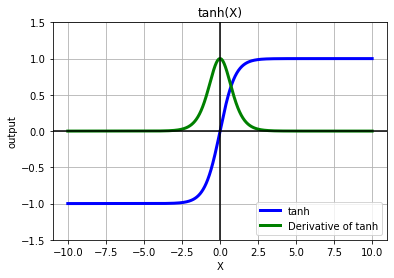

## 3. Rectified Linear Unit (ReLU)

$$f(x) = max(0, x)$$

ReLU es una de las funciones de activación más utilizadas que tiene muchas ventajas:

#### 1. Resuelve el problema del vanishing gradient 
ReLU no sufre el problema del gradiente de fuga ya que las pendientes son arbitrarias con respecto a las entradas

#### 2. Computacionalmente barato y simple de implementar
ReLU no involucra ninguna operación matemática y simplemente reemplaza x < 0 con 0.

### Problema con la ReLU

#### Problema Dying ReLU  

Debido a la naturaleza de ReLU, si un gradiente se propaga a la entrada, la red puede llegar a un estado en el que el sesgo sea muy bajo (negativo) y, por lo tanto, la salida de ReLU será 0 sin importar la entrada. Y dado que el gradiente de 0 es 0, la red no se recuperará de este estado y permanecerá siempre igual.


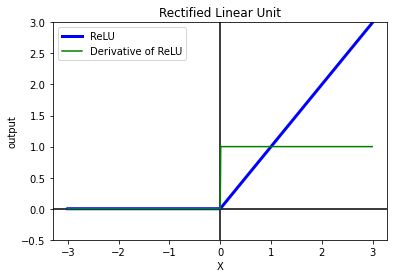

## 4. Leaky ReLU

$$f_r(x) = max(\alpha x, x)$$

Leaky ReLU tiene como objetivo resolver el problema de Dying ReLU agregando un pequeño valor alfa a los valores negativos. Por tanto, el gradiente sobre los valores negativos será alpa y la red podrá recuperarse.

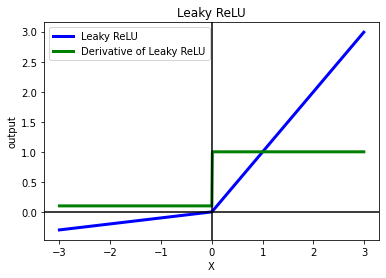

In [8]:
# consider alpha = 0.1


### Regla de aprendizaje

- En las RNA se considera que el conocimiento se encuentra representado en los pesos de las conexiones.

- El proceso de aprendizaje se basa en cambios en estos pesos.

### Formas de conexión entre neuronas

- Las salidas de las neuronas se convierten en entradas de otras neuronas.
- Cuando ninguna salida de las neuronas es entrada de neuronas del mismo nivel o de niveles precedentes, la red se describe como propagación hacia adelante (feedforward).

- En caso contrario la red se describe como propagación hacia atrás (feedback).

### Características de las RNA

>Topología

- Número de capas.

- Número de neuronas por capa.

- Tipo de conexiones. Normalmente, todas las neuronas de una capa reciben señales de la capa anterior (más cercana a la entrada) y envían su salida a las neuronas de la capa posterior (más cercana a la salida de la red).

>Tipos de aprendizaje

### Redes feedforward

La más conocidas son:
- perceptron
- Adaline
- Madaline
- Backpropagation

útilies en aplicaciones de reconocimiento o clasificación de patrones.

### Cómo funciona una red neuronal

<img src="Figures/red_pesos.png" width="50%">

Las redes neuronales se modelan como colecciones de neuronas que están conectadas en un gráfico acíclico. En otras palabras, las salidas de algunas neuronas pueden convertirse en entradas para otras neuronas. Los ciclos no están permitidos ya que eso implicaría un bucle infinito en el paso hacia adelante de una red. Los modelos de redes neuronales a menudo se organizan en distintas capas de neuronas.

Para las redes neuronales regulares, el tipo de capa más común es el **fully connected layer** en donde las neuronas entre dos capas adyacentes están completamente conectadas por pares, pero las neuronas dentro de una sola capa no comparten conexiones

<img src="Figures/RAN_layers.png" width="80%">

**Capa de salida**. A diferencia de todas las capas de una red neuronal, las neuronas comúnmente no tienen una función de activación (o se puede pensar que tienen una función de activación lineal). Esto se debe a que la última capa de salida se
toma para representar los scores de clase (por ejemplo, en la clasificación), o pueden ser números reales (por ejemplo, en regresión)

### Cómo aprende una red neuronal

>Por lo general, un modelo de red neuronal se entrena utilizando el Pesos y algoritmo de optimización de descenso de gradiente estocástico se actualizan usando el algoritmo backpropagation del error

>El "gradiente" en el algoritmo de gradiente descendente se refiere a un gradiente de error. El modelo con un conjunto dado de pesos se utiliza para hacer predicciones y se calcula el error de esas predicciones.

>El algoritmo de gradiente descendente busca cambiar los pesos para que la próxima iteración de tal forma que se reduzca el error, lo que significa que el algoritmo de optimización está navegando hacia abajo en el gradiente (o pendiente) del error.

<img src="Figures/gradient_descent.png" width="80%">

#### Función de coste (loss function)


La función de coste ( $l$ ), también llamada función de pérdida, loss function o cost function, es la encargada de cuantificar la distancia entre el valor real y el valor predicho por la red, en otras palabras, mide cuánto se equivoca la red al realizar predicciones. En la mayoría de casos, la función de coste devuelve valores positivos. Cuanto más próximo a cero es el valor de coste, mejor son las predicciones de la red (menor error), siendo cero cuando las predicciones se corresponden exactamente con el valor real.

La función de coste puede calcularse para una única observación o para un conjunto de datos (normalmente promediando el valor de todas las observaciones). El segundo caso, es el que se utiliza para dirigir el entrenamiento de los modelos.

Dependiendo del tipo de problema, regresión o clasificación, es necesario utilizar una función de coste u otra. En problemas de regresión, las más utilizadas son el error cuadrático medio y el error absoluto medio. En problemas de clasificación suele emplearse la función log loss, también llamada logistic loss o cross-entropy loss.


#### Error cuadrático medio

El error cuadrático medio (mean squared error, MSE) es con diferencia la función de coste más utilizada en problemas de regresión. Para una determinada observación  i , el error cuadrático se calcula como la diferencia al cuadrado entre el valor predicho  y^  y el valor real  y .

$$l^{(i)}(w,b)=(\hat{y}^{(i)}−y^{(i)})^2$$
 
Las funciones de coste suelen escribirse con la notación  $l(w,b)$  para hacer referencia a que su valor depende de los pesos y bias del modelo, ya que son estos los que determinan el valor de las predicciones  $y(i)$ .

Con frecuencia, esta función de coste se encuentra multiplicada por  1/2 , esto es simplemente por conveniencia matemática para simplificar el cálculo de su derivada.

$$l^{(i)}(w,b)=\frac{1}{2}( )^2$$
 
Para cuantificar el error que comete el modelo todo un conjunto de datos, por ejemplo los de entrenamiento, simplemente se promedia el error de todas las  $N$  observaciones.

$$L(w,b)=\frac{1}{n}\sum_{i=1}^n l^{(i)}(w,b)= \frac{1}{n}\sum_{i=1}^n (\hat{y}^{(i)}−y^{(i)})^2$$
 
Cuando un modelo se entrena utilizando el error cuadrático medio como función de coste, está aprendiendo a predecir la media de la variable respuesta.

#### Error medio absoluto

El error medio absoluto (mean absolute error, MAE) consiste en promediar el error absoluto de las predicciones.

$$L(w,b)= \frac{1}{n}\sum_{i=1}^n |\hat{y}^{(i)}−y^{(i)}|$$
 
El error medio absoluto es más robusto frente a outliers que el error cuadrático medio. Esto significa que el entrenamiento del modelo se ve menos influenciado por datos anómalos que pueda haber en el conjunto de entrenamiento. Cuando un modelo se entrena utilizando el error absoluto medio como función de coste, está aprendiendo a predecir la mediana de la variable respuesta.

#### Log loss, logistic loss o cross-entropy loss

En problemas de clasificación, la capa de salida utiliza como función de activación la función softmax. Gracias a esta función, la red devuelve una serie de valores que pueden interpretarse como la probabilidad de que la observación predicha pertenezca a cada una de las posibles clases.

Cuando la clasificación es de tipo binaria, donde la variable respuesta es 1 o 0, y  $p=Pr(y=1)$ , la función de coste log-likelihood se define como:

$$L_{log}(y,p)=−logPr(y|p)=−(ylog(p)+(1−y)log(1−p))$$
 
Para problemas de clasificación con más de dos clases, esta fórmula se generaliza a:

$$L_{log}(Y,P)=−logPr(Y|P)=−\frac{1}{N} \sum_{i=0}^{N-1}  \sum_{i=0}^{K-1} y_{i,k}log p_{i,k}$$
 
En ambos casos, minimizar esta la función equivale a que la probabilidad predicha para la clase correcta tienda a 1, y a 0 en las demás clases.

Dado que esta función se ha utilizado en campos diversos, se le conoce por nombres distintos: Log loss, logistic loss o cross-entropy loss, pero todos hacen referencia a lo mismo. Puede encontrarse una explicación más detallada de esta función de coste aquí.